In [3]:
import numpy as np                   
import pandas as pd       
import json
import platypus as plat             
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import pygmo as pg
from tabulate import tabulate

In [4]:
# MAP information (node & edge count)
map_df = pd.json_normalize(json.load(open("dao-map-info.json"))["data"])
map_df

,map-name,nodes,edges
0,dao-map/lak300d.map,11910,91288
1,dao-map/lak510d.map,7713,58592
2,dao-map/den206d.map,4543,32926
3,dao-map/lak506d.map,13894,100884
4,dao-map/orz500d.map,20155,152654
...,...,...,...
151,dao-map/orz203d.map,244,1712
152,dao-map/lak303d.map,14784,108352
153,dao-map/lak401d.map,43567,323006
154,dao-map/den400d.map,30182,231678


In [6]:
unique_nodes = map_df["nodes"].unique()
unique_edges = map_df["edges"].unique()
print("unique node count: ", len(unique_nodes))
print("unique edge count: ", len(unique_edges))

# ._. they are all different

unique node count:  156
unique edge count:  156


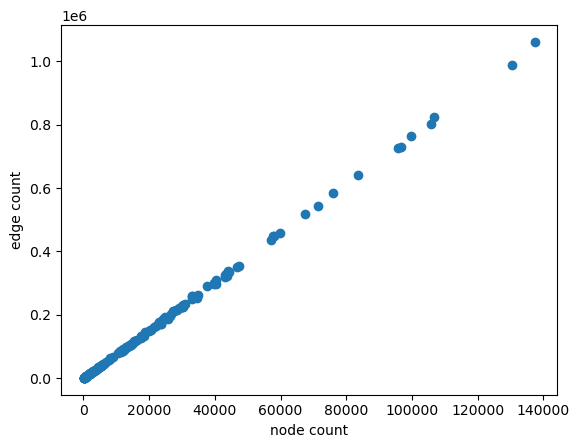

In [7]:
plt.scatter(unique_nodes, unique_edges)
plt.xlabel("node count")
plt.ylabel("edge count")
plt.show()

In [8]:
# scatter plot

In [85]:
#
# Loading VBEA data
#

borda_con = pd.json_normalize(json.load(open("borda.json"))["data"])
borda_com = pd.json_normalize(json.load(open("borda-combined.json"))["data"])

range_con = pd.json_normalize(json.load(open("range.json"))["data"])
range_com = pd.json_normalize(json.load(open("range-combined.json"))["data"])

condorent_con = pd.json_normalize(json.load(open("condorent.json"))["data"])

In [87]:
range_con

,map-id,source,target,voting-mechanism,child-generation-method,gen0-front,gen0-norm-front,gen0-d-score,gen0-norm-d-score,gen0-sparsity,...,gen4-time,gen5-front,gen5-norm-front,gen5-d-score,gen5-norm-d-score,gen5-sparsity,gen5-winner,gen5-winner-d-score,gen5-winner-norm-d-score,gen5-time
0,dao-map/ost004d.map,4274,937,range,weighted_conscious,"[[50, 50.414, 564, 126, 175.5], [50, 50.414, 5...","[[0, 0, 0.922892, 1, 0], [0, 0, 0.922892, 1, 0...","[1.36078, 1.85242, 1.0067, 1.36078]","[1.36078, 1.85242, 1.0067, 1.36078]",50956.50,...,211,"[[50, 52.07, 501, 75, 177.5], [50, 52.07, 501,...","[[0, 5.22765e-16, 0.738155, 0, 0], [0, 5.22765...","[1.36078, 1.85242, 1.0067, 1.36078]","[0.738155, 1, 0.769835, 1.02877, 0.769835, 1.5...",7920.670,"[50, 52.07, 501, 75, 177.5]",0.738155,8.596742e-322,208
1,dao-map/ost004d.map,3111,3309,range,weighted_conscious,"[[54, 54.828, 590, 140.5, 242], [54, 54.828, 5...","[[0, 0, 1, 0.868613, 0.764706], [0, 0, 1, 0.86...","[1.52947, 1.9492, 1.15171, 1.40308]","[1.52947, 1.9492, 1.15171, 1.40308]",34958.20,...,294,"[[54, 66.42, 247, 81, 228], [54, 66.42, 247, 8...","[[0, 0.631579, 0.0340136, 0, 0.368421], [0, 0....","[1.52947, 1.9492, 1.15171, 1.40308]","[0.731972, 0.716844, 0.712028, 1.00452, 1.4142...",11872.100,"[54, 66.42, 247, 81, 228]",0.731972,2.198592e-321,290
2,dao-map/ost004d.map,3366,4402,range,weighted_conscious,"[[23, 30.038, 243, 60, 114], [23, 30.038, 243,...","[[0, 0, 1, 1, 0.040404], [0, 0, 1, 1, 0.040404...","[1.41479, 1.89335, 0.987101, 1.3775]","[1.41479, 1.89335, 0.987101, 1.3775]",6302.53,...,142,"[[23, 30.038, 242, 34.5, 112], [23, 30.038, 24...","[[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0.333333, ...","[1.41479, 1.89335, 0.987101, 1.3775]","[1, 0.737577, 1.04608, 1.10848, 1.22661, 1.741...",802.459,"[23, 30.038, 242, 34.5, 112]",1.000000,2.272702e-321,141
3,dao-map/ost004d.map,4151,4286,range,weighted_conscious,"[[28, 32.968, 324, 59, 133], [28, 32.968, 324,...","[[0, 0, 1, 0.507463, 0.193548], [0, 0, 1, 0.50...","[1.13797, 2, 0.858644, 0.918202]","[1.13797, 2, 0.858644, 0.918202]",9105.34,...,151,"[[28, 36.28, 206, 42, 124.5], [28, 36.28, 206,...","[[0, 0.679431, 0.351562, 0, 0.0769231], [0, 0....","[1.13797, 2, 0.858644, 0.918202]","[0.768856, 1, 1.71185, 1, 2]",2051.390,"[28, 33.796, 289, 42, 124]",1.000000,4.836903e-321,146
4,dao-map/ost004d.map,3615,497,range,weighted_conscious,"[[45, 62.802, 473, 84.5, 179], [45, 62.802, 47...","[[0, 0, 0.848276, 0.0752688, 0], [0, 0, 0.8482...","[0.851609, 2, 1.00141, 0.851609]","[0.851609, 2, 1.00141, 0.851609]",27993.60,...,317,"[[46, 63.388, 423, 77.5, 183], [46, 63.388, 42...","[[0.125, 0.0923707, 0.704142, 0, 0.125], [0.12...","[0.851609, 2, 1.00141, 0.851609]","[0.731846, 0.670049, 1.06571, 0.758091, 1.3018...",612.859,"[46, 63.388, 423, 77.5, 183]",0.731846,0.000000e+00,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,dao-map/lak100d.map,21061,8688,range,weighted_conscious,"[[299, 348.68, 3037, 763, 1306.5], [299, 348.6...","[[0, 0.0785659, 0.871942, 0.77284, 0.561584], ...","[1.29581, 1.14209, 2, 0.999286, 1.12631]","[1.29581, 1.14209, 2, 0.999286, 1.12631]",866574.00,...,1411,"[[303, 362.616, 1877, 454.5, 1137], [303, 362....","[[0, 0.222136, 0.267467, 0, 0.176166], [0, 0.2...","[1.29581, 1.14209, 2, 0.999286, 1.12631]","[0.389766, 0.468781, 1, 0.913623, 0.942991, 1....",208795.000,"[303, 362.616, 1877, 454.5, 1137]",0.389766,4.273668e-321,1403
2336,dao-map/lak100d.map,15863,6372,range,weighted_conscious,"[[192, 239.196, 2036, 475, 821.5], [192, 239.1...","[[0, 0.0103981, 1, 0.671454, 0.411111], [0, 0....","[1.27278, 1.3306, 2, 0.939336, 1.01975]","[1.27278, 1.3306, 2, 0.939336, 1.01975]",267127.00,...,1020,"[[193, 240.61, 1533, 289.5, 736.5], [193, 240....","[[0, 0.0727464, 0.533133, 0, 0.0869565], [0, 0...","[1.27278, 1.3306, 2, 0.939336, 1.01975]","[0.545054, 0.672847, 0.493945, 0.907696, 1, 1....",17288.400,"[193, 240.61, 1533, 289.5, 736.5]",0.545054,4.644217e-322,1020
2337,dao-map/

In [86]:
range_con = range_con.rename(columns={"gen0-winner": "gen0-raw-winner", "gen1-winner": "gen1-raw-winner", "gen2-winner": "gen2-raw-winner", "gen3-winner": "gen3-raw-winner", "gen4-winner": "gen4-raw-winner"})
# REDO range conscious, used an older json format!

In [113]:
#
# Loading A*pex data
#
APEX_MS_1_0 = pd.json_normalize(json.load(open("A-pex/MS_1_0.json"))["data"])

APEX_MS_0_5 = pd.json_normalize(json.load(open("A-pex/MS_0_5.json"))["data"])

APEX_MS_0_1 = pd.json_normalize(json.load(open("A-pex/MS_0_1.json"))["data"])

APEX_MS_0_01 = pd.json_normalize(json.load(open("A-pex/MS_0_01.json"))["data"])

APEX_RAN_1_0 = pd.json_normalize(json.load(open("A-pex/RAN_1_0.json"))["data"])

APEX_RAN_0_1 = pd.json_normalize(json.load(open("A-pex/RAN_0_1.json"))["data"])

In [12]:
#
# Sparsity
#

In [13]:
# overall average
def VBEA_SPAR(df):
    sparsity_df = df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
    avg_gen_sparsity = sparsity_df.mean(axis=0)
    return avg_gen_sparsity.tolist()

In [14]:
# Averages the map averages
def VBEA_SPAR_2(df):
    avg_map_sparsity = []
    maps = df["map-id"].unique()
    for MAP in maps:
        map_df = df[df["map-id"] == MAP]
        map_df = map_df.filter(["gen0-sparsity","gen1-sparsity", "gen2-sparsity", "gen3-sparsity", "gen4-sparsity", "gen5-sparsity"])
        avg_map_sparsity.append(map_df.mean(axis=0).tolist())

    avg_map_sparsity = pd.DataFrame(avg_map_sparsity, columns = ["0", "1", "2", "3", "4", "5"])
    return avg_map_sparsity.mean(axis=0).tolist()

In [15]:
def percentage_change(data):
    per_change = []
    for i in range(1, len(data)):
        per_change.append( ((data[i] - data[i-1]) / data[i-1]) * 100)
    return per_change

In [16]:
# difference?
borda_con_spar = VBEA_SPAR(borda_con)
borda_com_spar = VBEA_SPAR(borda_com)
range_con_spar = VBEA_SPAR(range_con)
range_com_spar = VBEA_SPAR(range_com)
condor_con_spar = VBEA_SPAR(condorent_con)

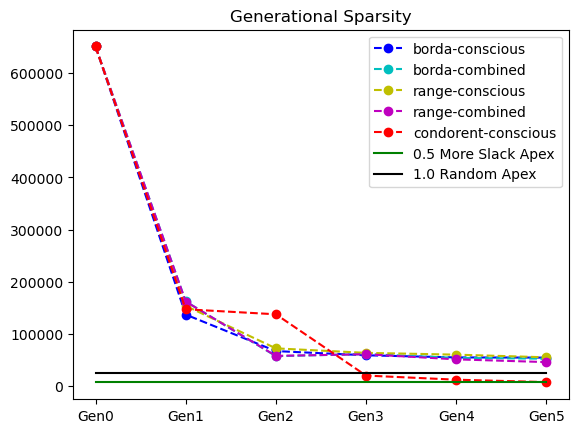

In [132]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_spar
ax.plot(y, '--bo', label='borda-conscious')

y = borda_com_spar
ax.plot(y, '--co', label='borda-combined')

y = range_con_spar
ax.plot(y, '--yo', label='range-conscious')

y = range_com_spar
ax.plot(y, '--mo', label='range-combined')

y = condor_con_spar
ax.plot(y, '--ro', label='condorent-conscious')

y = [6873.903355] * 6
ax.plot(y, '-g', label='0.5 More Slack Apex')

y = [24259.458094] * 6
ax.plot(y, '-k', label='1.0 Random Apex')
        
plt.title("Generational Sparsity")
plt.legend()
plt.show()

In [18]:
borda_con_spar_diff = percentage_change(borda_con_spar)
borda_com_spar_diff = percentage_change(borda_com_spar)
range_con_spar_diff = percentage_change(range_con_spar)
range_com_spar_diff = percentage_change(range_com_spar)
condor_con_spar_diff = percentage_change(condor_con_spar)

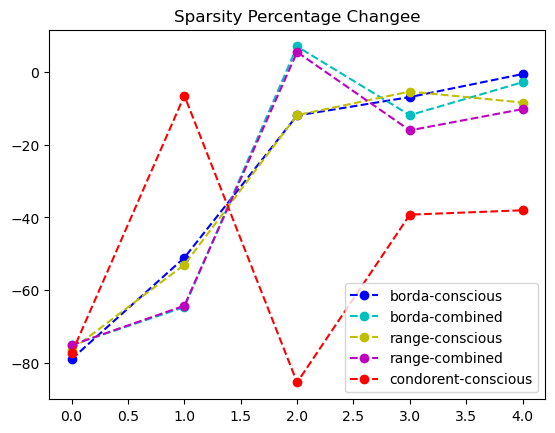

In [19]:
fig, ax = plt.subplots()
x = [1,2,3,4,5]
x_ticks = ["Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]

y = borda_con_spar_diff
ax.plot(y, '--bo', label='borda-conscious')

y = borda_com_spar_diff
ax.plot(y, '--co', label='borda-combined')

y = range_con_spar_diff
ax.plot(y, '--yo', label='range-conscious')

y = range_com_spar_diff
ax.plot(y, '--mo', label='range-combined')

y = condor_con_spar_diff
ax.plot(y, '--ro', label='condorent-conscious')

plt.title("Sparsity Percentage Changee")
plt.legend()
plt.show()

In [124]:
def Apex_SPAR(df):
    sparsity_df = df.filter(["sparsity"])
    avg_sparsity = sparsity_df.mean(axis=0)
    return avg_sparsity.to_string()

In [125]:
ms_1_0_spar = Apex_SPAR(APEX_MS_1_0)
ms_0_5_spar = Apex_SPAR(APEX_MS_0_5)
ms_0_1_spar = Apex_SPAR(APEX_MS_0_1)
ms_0_01_spar = Apex_SPAR(APEX_MS_0_01)
ran_1_0_spar = Apex_SPAR(APEX_RAN_1_0)
ran_0_1_spar = Apex_SPAR(APEX_RAN_0_1)

In [127]:
# allign? Make as a table
print("merge_smaller 1.0 sparsity: ", ms_1_0_spar)
print("merge_smaller 0.5 sparsity: ", ms_0_5_spar)
print("merge_smaller 0.1 sparsity: ", ms_0_1_spar)
print("merge_smaller 0.01 sparsity: ", ms_0_01_spar)
print("-----")
print("random 1.0 sparsity: ", ran_1_0_spar)
print("random 0.1 sparsity: ", ran_0_1_spar)

merge_smaller 1.0 sparsity:  sparsity    84.64637
merge_smaller 0.5 sparsity:  sparsity    6873.903355
merge_smaller 0.1 sparsity:  sparsity    113.616652
merge_smaller 0.01 sparsity:  sparsity    21.819948
-----
random 1.0 sparsity:  sparsity    24259.458094
random 0.1 sparsity:  sparsity    113.165874


In [23]:
#
# Hypervolume
#

In [24]:
# front is a list of solutions
def get_hv(front):
    inver = [] 
    for row in front:
        temp_row = []
        for val in row:
            temp_row.append(-val)
        inver.append(temp_row)

    ref = [0] * len(front[0]) # always use the reference point {0, 0, ..., 0}
    hv = pg.hypervolume(inver) #initialize hypervolume
    # catch cases where the front is too small to calculate hypervolune
    try:
        h = hv.compute(ref)
    except ValueError:
        h = -1
        print("----------------------", "\n", "No good ref point")
        print(front)

    return h

In [25]:
# gets the hypervolumem for each generatiojn
def VBEA_HV(df):
    fronts_df = df.filter(["gen0-front", "gen1-front", "gen2-front", "gen3-front", "gen4-front", "gen5-front"])
    gen_HV = []
    for index, row in fronts_df.iterrows(): #iterate over rows
        cur = []
        for gen_front in row: #iterate over generations of a row
            cur.append(get_hv(gen_front))
        gen_HV.append(cur)

    HV_df = pd.DataFrame(gen_HV, columns = ["gen0-HV", "gen1-HV", "gen2-HV", "gen3-HV", "gen4-HV", "gen5-HV"])
    return HV_df.mean(axis=0).tolist()

In [26]:
def Apex_HV(df):
    HVs = []
    fronts_df = df.filter(["front"])
    for index, row in fronts_df.iterrows():
        HVs.append(get_hv(row["front"].tolist()))


In [27]:
def Apex_HV_add(df):
    HVs = []
    # add new
    for index, row in df.iterrows():
        HVs.append(get_hv(row["front"]))

    df.insert(9, "hypervolume",HVs, True)
    return df


In [28]:
# difference?
# why [0, ...., 0] ? 
borda_con_hv = VBEA_HV(borda_con)
borda_com_hv = VBEA_HV(borda_com)
range_con_hv = VBEA_HV(range_con)
range_com_hv = VBEA_HV(range_com)
condorent_con_hv = VBEA_HV(condorent_con)

---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
---------------------- 
 No good ref point
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
----------

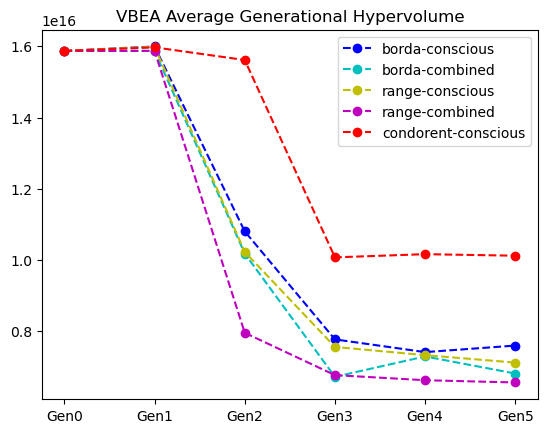

In [29]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_hv
ax.plot(y, '--bo', label='borda-conscious')

y = borda_com_hv
ax.plot(y, '--co', label='borda-combined')

y = range_con_hv
ax.plot(y, '--yo', label='range-conscious')

y = range_com_hv
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_hv
ax.plot(y, '--ro', label='condorent-conscious')

plt.title("VBEA Average Generational Hypervolume")
plt.legend()
plt.show()

In [30]:
## looking at the dism lm-mod-disabledåååååååå by looking at the distrabution of the the objective cost 

In [31]:
borda_con_hv_diff = percentage_change(borda_con_hv)
borda_com_hv_diff = percentage_change(borda_com_hv)
range_con_hv_diff = percentage_change(range_con_hv)
range_com_hv_diff = percentage_change(range_com_hv)
condorent_con_hv_diff = percentage_change(condorent_con_hv)

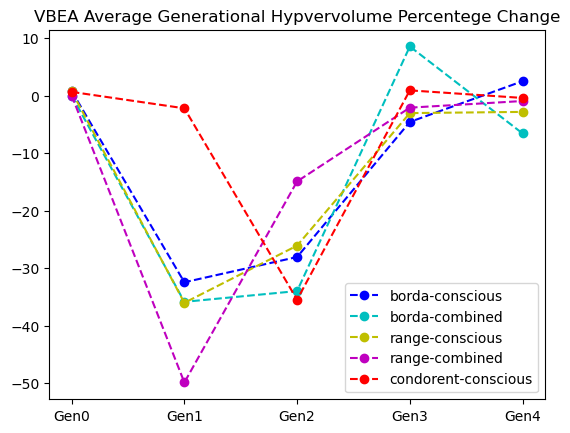

In [32]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_hv_diff
ax.plot(y, '--bo', label='borda-conscious')

y = borda_com_hv_diff
ax.plot(y, '--co', label='borda-combined')

y = range_con_hv_diff
ax.plot(y, '--yo', label='range-conscious')

y = range_com_hv_diff
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_hv_diff
ax.plot(y, '--ro', label='condorent-conscious')

plt.title("VBEA Average Generational Hypvervolume Percentege Change")
plt.legend()
plt.show()

In [33]:
#
# Scatter plot for map size and 
#

In [34]:
#
# Representative Path change 
#

In [35]:
def average_rep_path_cost(df):
    average_gen_rep_cost = []
    rep_path_df = df.filter(["gen0-raw-winner", "gen1-raw-winner", "gen2-raw-winner", "gen3-raw-winner", "gen4-raw-winner", "gen5-raw-winner"])
    for gen in rep_path_df:
        average_gen_rep_cost.append(np.array(rep_path_df[gen].tolist()).mean(axis=0))

    return average_gen_rep_cost

In [36]:
def average_norm_rep_path_cost(df):
    average_gen_rep_cost = []
    rep_path_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
    for gen in rep_path_df:
        average_gen_rep_cost.append(np.array(rep_path_df[gen].tolist()).mean(axis=0))

    return average_gen_rep_cost

In [54]:
borda_con_avg_rep = average_rep_path_cost(borda_con)
borda_com_avg_rep = average_rep_path_cost(borda_com)

range_con_avg_rep = average_rep_path_cost(range_con)
range_com_avg_rep = average_rep_path_cost(range_com)

condorent_con_avg_rep = average_rep_path_cost(condorent_con)

In [39]:
def average_norm_rep_path_cost(df):
    average_gen_rep_cost = []
    rep_path_df = df.filter(["gen0-norm-winner", "gen1-norm-winner", "gen2-norm-winner", "gen3-norm-winner", "gen4-norm-winner", "gen5-norm-winner"])
    for gen in rep_path_df:
        average_gen_rep_cost.append(np.array(rep_path_df[gen].tolist()).mean(axis=0))

    return average_gen_rep_cost

In [89]:
borda_con_avg_norm_rep = average_norm_rep_path_cost(borda_con)
borda_com_avg_norm_rep = average_norm_rep_path_cost(borda_com)

range_con_avg_norm_rep = average_norm_rep_path_cost(range_con)
range_com_avg_norm_rep = average_norm_rep_path_cost(range_com)

condorent_con_avg_norm_rep = average_norm_rep_path_cost(condorent_con)

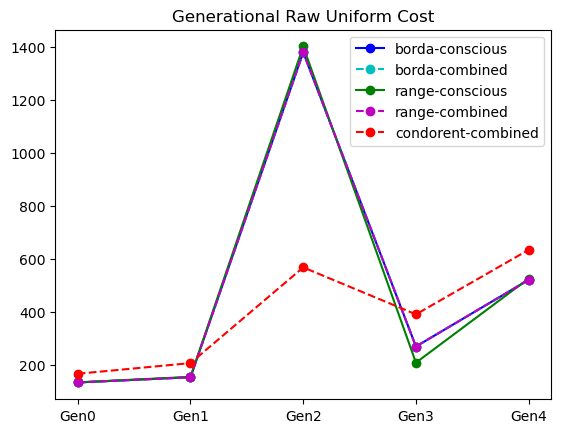

In [73]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_rep[0]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_rep[0]
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_rep[0]
ax.plot(y, '-go', label='range-conscious')

y = borda_com_avg_rep[0]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_rep[0]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Raw Uniform Cost")
plt.show()

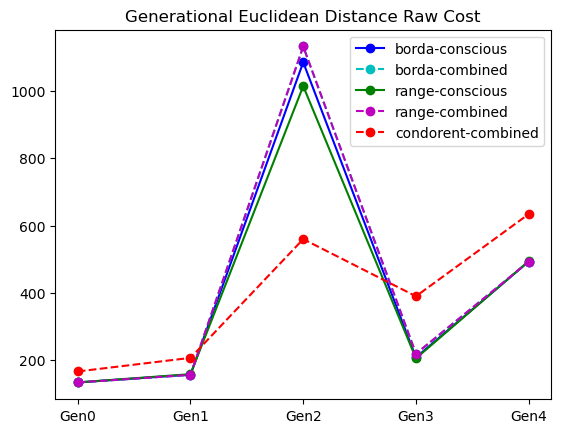

In [74]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_rep[1]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_rep[1]
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_rep[1]
ax.plot(y, '-go', label='range-conscious')

y = borda_com_avg_rep[1]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_rep[1]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Euclidean Distance Raw Cost")
plt.show()

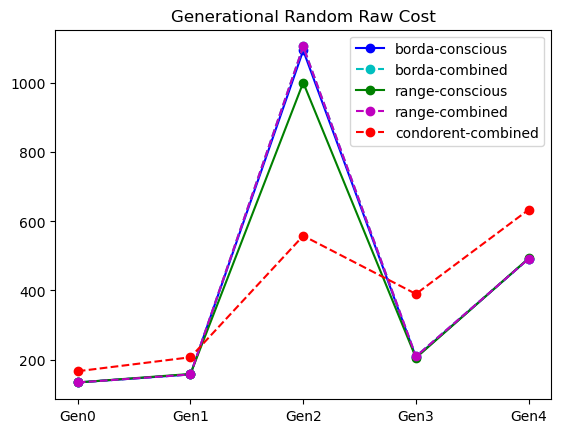

In [75]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_rep[2]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_rep[2]
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_rep[2]
ax.plot(y, '-go', label='range-conscious')

y = borda_com_avg_rep[2]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_rep[2]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Random Raw Cost")
plt.show()

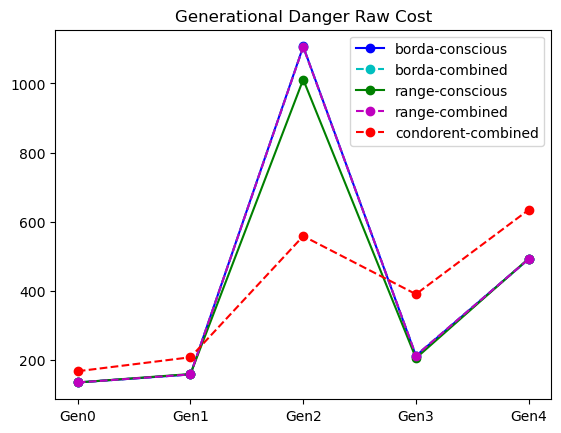

In [76]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_rep[3]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_rep[3]
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_rep[3]
ax.plot(y, '-go', label='range-conscious')

y = borda_com_avg_rep[3]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_rep[3]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Danger Raw Cost")
plt.show()

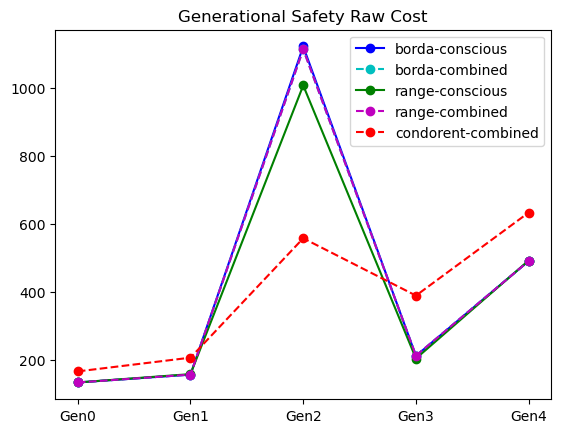

In [77]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_rep[4]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_rep[4]
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_rep[4]
ax.plot(y, '-go', label='range-conscious')

y = borda_com_avg_rep[4]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_rep[4]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Safety Raw Cost")
plt.show()

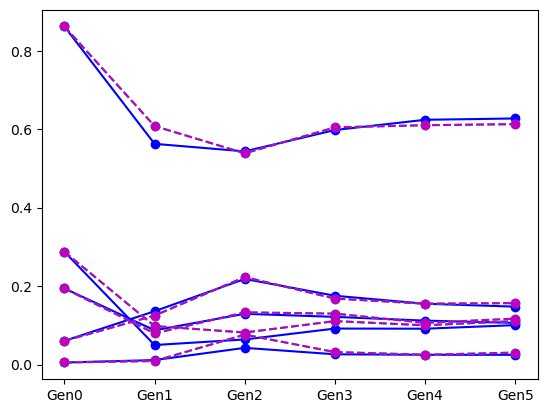

In [78]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_norm_rep
ax.plot(y, '--co', label='borda-combined')

y = range_con_avg_norm_rep
ax.plot(y, '-ro', label='range-conscious')

y = borda_com_avg_norm_rep
ax.plot(y, '--mo', label='range-combined')


plt.show()

In [ ]:
#NORM

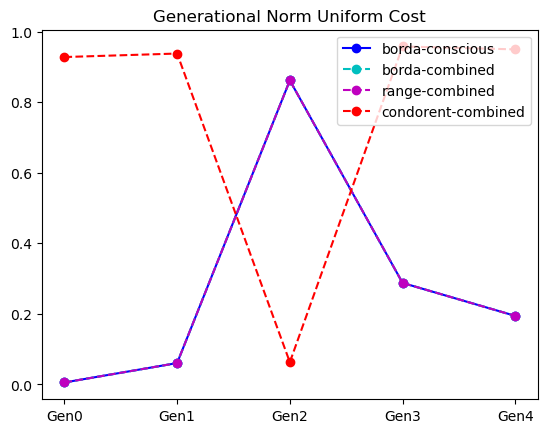

In [91]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep[0]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_norm_rep[0]
ax.plot(y, '--co', label='borda-combined')

y = borda_com_avg_norm_rep[0]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_norm_rep[0]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Norm Uniform Cost")
plt.show()

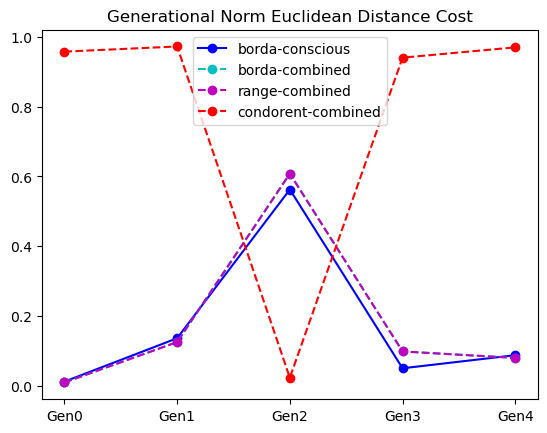

In [92]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep[1]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_norm_rep[1]
ax.plot(y, '--co', label='borda-combined')

y = borda_com_avg_norm_rep[1]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_norm_rep[1]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Norm Euclidean Distance Cost")
plt.show()

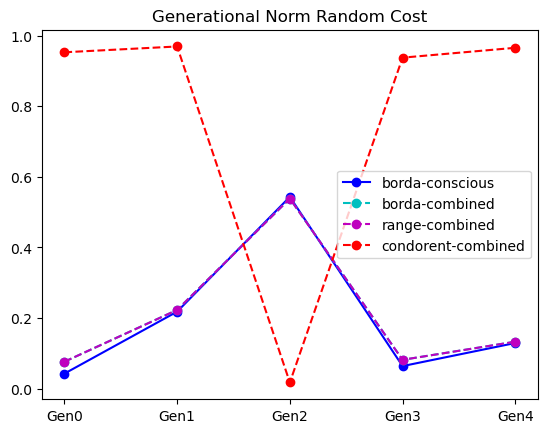

In [93]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep[2]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_norm_rep[2]
ax.plot(y, '--co', label='borda-combined')

y = borda_com_avg_norm_rep[2]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_norm_rep[2]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Norm Random Cost")
plt.show()

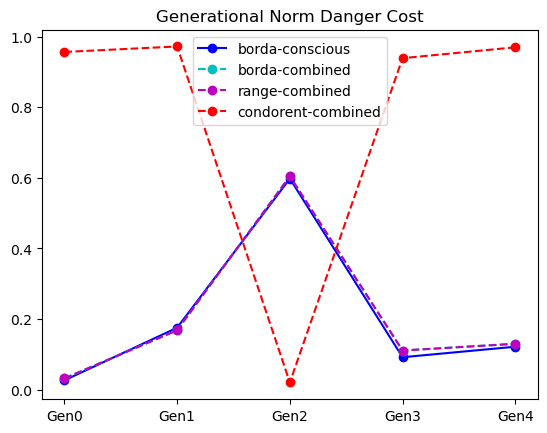

In [94]:
fig, ax = plt.subplots()
x = [0,1,2,3,4,5]
x_ticks = ["Gen0", "Gen1", "Gen2", "Gen3", "Gen4", "Gen5"]
plt.xticks(x,x_ticks)

y = borda_con_avg_norm_rep[3]
ax.plot(y, '-bo', label='borda-conscious')

y = borda_com_avg_norm_rep[3]
ax.plot(y, '--co', label='borda-combined')

y = borda_com_avg_norm_rep[3]
ax.plot(y, '--mo', label='range-combined')

y = condorent_con_avg_norm_rep[3]
ax.plot(y, '--ro', label='condorent-combined')

plt.legend()
plt.title("Generational Norm Danger Cost")
plt.show()

In [315]:
#
# Run times
#

In [65]:
def avg_gen_runtime_by_map(df):
    MAPS = df["map-id"].unique()
    gen_run_time = []
    for MAP in MAPS:
        map_df = df[df["map-id"] == MAP]
        map_df = map_df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
        gen_run_time.append(map_df.mean(axis=0).tolist())
    return MAPS, gen_run_time

In [ ]:
def avg_gen_runtime_by_map_size(df):
    MAPS = df["map-id"].unique()
    map_df = pd.json_normalize(json.load(open("dao-map-info.json"))["data"])
    gen_run_time = []
    map_size = []
    for MAP in MAPS:
        map_df = df[df["map-id"] == MAP]
        map_size.append(map_df[map_df
        map_df = map_df.filter(["gen0-time", "gen1-time", "gen2-time", "gen3-time", "gen4-time", "gen5-time"])
        gen_run_time.append(map_df.mean(axis=0).tolist())
    return MAPS, gen_run_time

In [66]:
# averaging the generational run time by map
unique_maps, run_time = avg_gen_runtime_by_map(borda_con)
run_time = np.array(run_time).T

In [101]:
map_node = []
map_edge = []
MAPS = map_df["map-name"].unique()
for MAP in MAPS:


Text(0, 0.5, 'Run time')

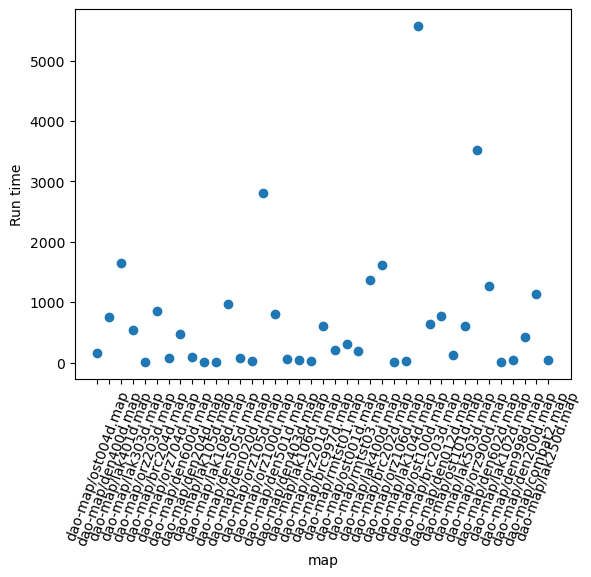

In [97]:
plt.scatter(unique_maps[:39], run_time[0][:39])
plt.xlabel("map")
plt.xticks(rotation=70)
plt.ylabel("Run time")
plt.show()

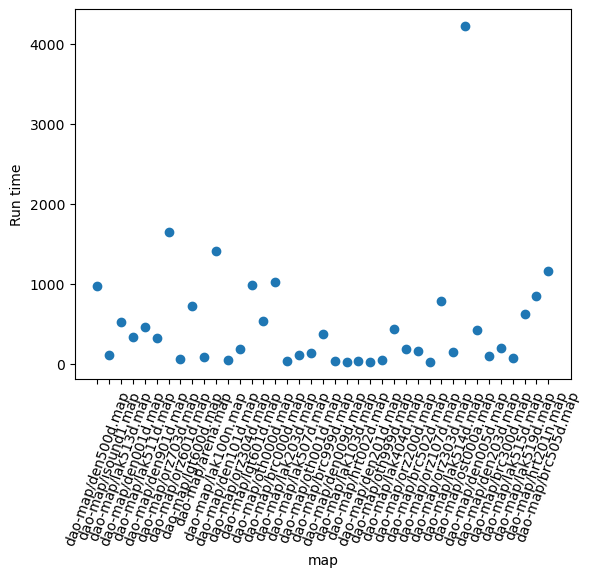

In [99]:
plt.scatter(unique_maps[40:79], run_time[0][40:79])
plt.xlabel("map")
plt.xticks(rotation=70)
plt.ylabel("Run time")
plt.show()